In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_theme(style="darkgrid")
import plotly.express as px
import plotly.graph_objects as go

In [2]:
path = r"CBS.csv"

data = pd.read_csv(path,sep=';',skiprows=[0, 1, 2, 3 ],header=[0, 1, 2],index_col=[0])
data = data.replace(',', '.', regex=True)

data = data.dropna(thresh=data.shape[1] - 1)
data = data.drop('Unnamed: 1_level_0',axis=1,level=0)
data.index = data.index.str.replace('*', '', regex=False)
display(data)



Vervoerwijzen  \
                                       Onderwerp   
Perioden                            Reismotieven   
1999                                      Totaal   
1999                        Van en naar het werk   
1999                 Winkelen. boodschappen doen   
1999      Onderwijs volgen. cursus. kinderopvang   
1999                                  Vrije tijd   
...                                          ...   
2019                        Van en naar het werk   
2019                 Winkelen. boodschappen doen   
2019      Onderwijs volgen. cursus. kinderopvang   
2019                                  Vrije tijd   
2019                        Overige reismotieven   

                                         Totaal  \
         Ritten per persoon per dag (gemiddeld)   
Perioden                                 aantal   
1999                                       3.41   
1999                                       0.59   
1999                                       0.73   
1999                                        0.3   
1999                                       1.19   
...                                         ...   
2019                                       0.61   
2019                                       0.57   
2019                                       0.28   
2019                                       1.05   
2019                                       0.45   

                                                                 \
         Afgelegde afstand per rit (gemiddeld) Reisduur per rit   
Perioden                                    km          Minuten   
1999                                     10.96            23.72   
1999                                     14.78            24.83   
1999                                      4.96            14.97   
1999                                      6.85            17.64   
1999                                     12.42            31.37   
...                                        ...              ...   
2019                                     16.13            24.83   
2019                                      5.36            14.35   
2019                                      7.28            18.58   
2019                                      13.5            32.59   
2019                                     11.87            19.57   

                              Auto (bestuurder)  \
         Ritten per persoon per dag (gemiddeld)   
Perioden                                 aantal   
1999                                       1.06   
1999                                       0.23   
1999                                       0.23   
1999                                       0.02   
1999                                       0.31   
...                                         ...   
2019                                       0.25   
2019                                        0.2   
2019                                       0.01   
2019                                       0.26   
2019                                       0.21   

                                                                 \
         Afgelegde afstand per rit (gemiddeld) Reisduur per rit   
Perioden                                    km          Minuten   
1999                                     16.16            23.91   
1999                                     20.62            28.76   
1999                                      6.94            14.57   
1999                                     21.61            25.68   
1999                                     18.15             27.9   
...                                        ...              ...   
2019                                     24.99            30.38   
2019                                      7.78            14.86   
2019                                     26.09            33.31   
2019                                     22.07            29.47   
2019                                     16.31            22.08   

In [18]:

Total = data.iloc[:,[0, 1, 2, 3]]
Car_driver = data.iloc[:,[0, 4, 5, 6]]
Car_passenger = data.iloc[:,[0, 7, 8, 9]]
Train = data.iloc[:,[0, 10, 11, 12]]
Bus_tram_metro = data.iloc[:,[0, 13, 14, 15]]
Bicycle = data.iloc[:,[0, 16, 17, 18]]
Walking = data.iloc[:,[0, 19, 20, 21]]
Others = data.iloc[:,[0, 22, 23, 24]]

# Create a list of the datasets you want to process
datasets = [Total, Car_driver, Car_passenger, Train, Bus_tram_metro, Bicycle, Walking, Others]

# Iterate over each dataset
for df in datasets:
    # Drop the first two levels of the column index (if applicable)
    df.columns = df.columns.droplevel([0, 1])
    
    # Convert relevant columns to numeric, handling errors
    df['aantal'] = pd.to_numeric(df['aantal'], errors='coerce')
    df['km'] = pd.to_numeric(df['km'], errors='coerce')
    df['Minuten'] = pd.to_numeric(df['Minuten'], errors='coerce')
    
    # Calculate 'snelheid' (speed) by dividing distance by time in hours
    df['snelheid'] = df['km'] / (df['Minuten'] / 60)
    
display(Bicycle)

C:\Users\vande\AppData\Local\Temp\ipykernel_19764\1236275197.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vande\AppData\Local\Temp\ipykernel_19764\1236275197.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vande\AppData\Local\Temp\ipykernel_19764\1236275197.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Perioden,Reismotieven,aantal,km,Minuten,snelheid
1999,Totaal,0.87,3.18,19.02,10.031546
1999,Van en naar het werk,0.15,3.50,17.29,12.145749
1999,Winkelen. boodschappen doen,0.20,1.84,12.41,8.896052
1999,Onderwijs volgen. cursus. kinderopvang,0.12,2.81,15.61,10.800769
1999,Vrije tijd,0.27,4.61,28.74,9.624217
...,...,...,...,...,...
2019,Van en naar het werk,0.16,4.04,18.03,13.444260
2019,Winkelen. boodschappen doen,0.16,2.06,11.91,10.377834
2019,Onderwijs volgen. cursus. kinderopvang,0.13,3.26,16.69,11.719593
2019,Vrije tijd,0.27,5.12,31.04,9.896907


In [26]:
#display(totaal)

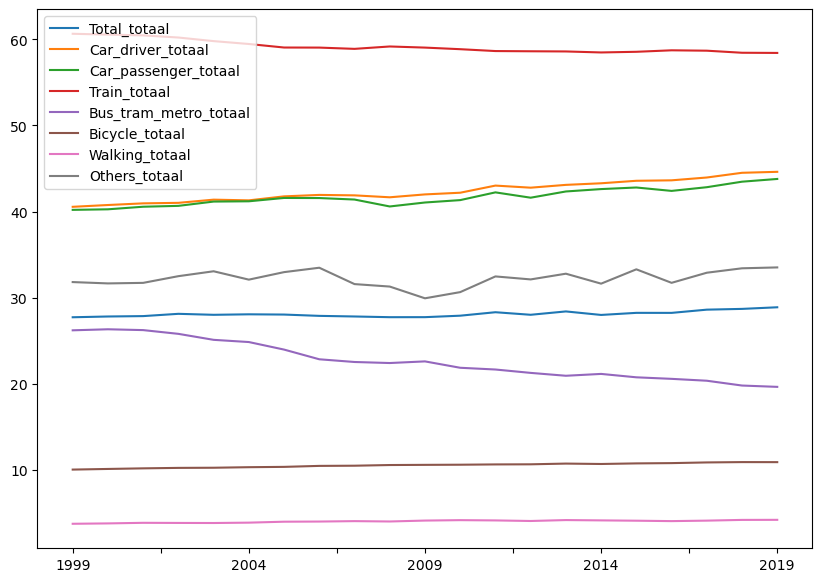

In [31]:
# totalen_totaal = totaal[totaal['Reismotieven'] == 'Totaal']
# display(totalen_totaal)
# totalen_totaal['snelheid'].plot()

dataset_names = ['Total', 'Car_driver', 'Car_passenger', 'Train', 'Bus_tram_metro', 'Bicycle', 'Walking', 'Others']
plt.figure(figsize=(10, 7))

for i in range(len(datasets)):
    df_name = f"{dataset_names[i]}_totaal"
    naam = f"{dataset_names[i]}_totaal"
    df_name = datasets[i][datasets[i]['Reismotieven'] == 'Totaal']
    df_name['snelheid'].plot(label=naam)
    plt.legend()

plt.show()

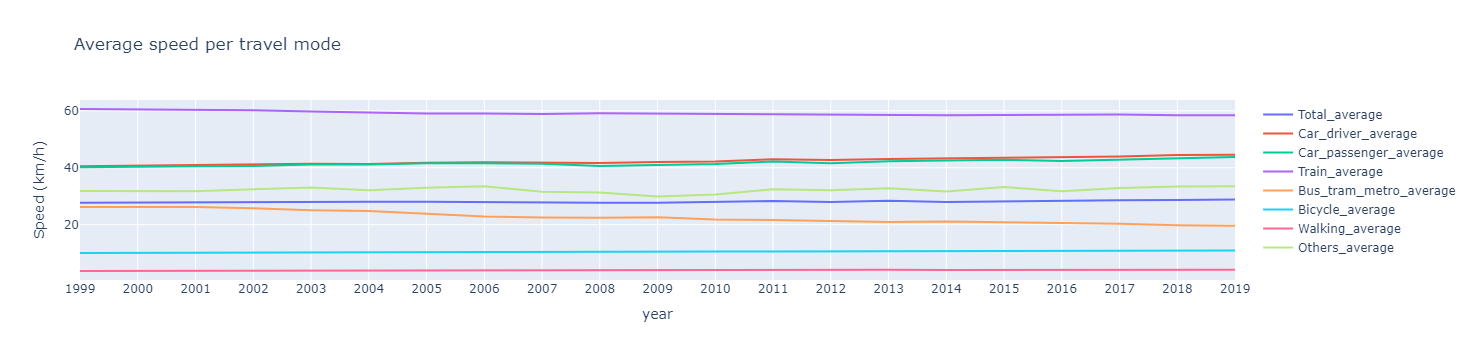

In [34]:

# Define the dataset names and create an empty figure
fig = go.Figure()
dataset_names = ['Total', 'Car_driver', 'Car_passenger', 'Train', 'Bus_tram_metro', 'Bicycle', 'Walking', 'Others']

# Loop through the datasets and add traces directly to the figure
for i in range(len(datasets)):
    naam = f"{dataset_names[i]}_average"
    df = datasets[i][datasets[i]['Reismotieven'] == 'Totaal']
    fig.add_trace(
        go.Scatter(
            x=df.index,  # Use the index as the x-axis (or specify the desired column)
            y=df['snelheid'],
            mode='lines',
            name=naam
        )
    )

# Show the combined plot
fig.update_layout(title='Average speed per travel mode', xaxis_title='year', yaxis_title='Speed (km/h)')
fig.show()


In [36]:
# Define the dataset names and create an empty figure
fig = go.Figure()
dataset_names = ['Car_driver', 'Car_passenger', 'Train', 'Bus_tram_metro', 'Bicycle', 'Walking']

# Loop through the datasets and add traces directly to the figure
for i in range(len(dataset_names)):
    naam = f"{dataset_names[i]}_average"
    df = datasets[i][datasets[i]['Reismotieven'] == 'Totaal']
    fig.add_trace(
        go.Scatter(
            x=df.index,  # Use the index as the x-axis (or specify the desired column)
            y=df['snelheid'],
            mode='lines',
            name=naam
        )
    )

# Show the combined plot
fig.update_layout(title='Average speed per travel mode', xaxis_title='year', yaxis_title='Speed (km/h)')
fig.show()